##  Linear Regression

The objective of this problem is to implement basic linear regression, using both the closed-form solution and gradient descent.


* **Dataset:** $\mathcal{D}=\{x^{(i)},y^{(i)}\}_{i=1}^{n}$ where $x^{(i)} \in \mathbb{R}^{d}$ and $y^{(i)} \in \mathbb{R}$.
* **Weights:** $w \in \mathbb{R}^{d}$.
* **Hypothesis Function:** $h_{w}(x)=w^{T}x$.

**Loss Function ($L2$ Loss):**
$$ \mathcal{L}(w)=\frac{1}{n}\sum_{i=1}^{N}(y_{i}-w^{T}x^{(i)})^{2} $$

**Closed-form Solution:**
$$ w^{*}:=(X^{T}X)^{-1}X^{T}y $$


## Function Descriptions

* **`train_test_split()`**: This function generates an 80:20 train:test split given a dataset. **You do not need to edit this function.**

* **`w_closed_form()`**: Write the code for the closed-form solution of the linear regression problem in this function.

* **`l2_loss()`**: Write the code to calculate $L2$ Loss in this function.

* **`l2_loss_derivative()`**: Write the code to compute the gradient of the $L2$-Loss function.

* **`train_model()`**: Implement gradient descent
  * Note that you will have to optimise the `l2_loss` on the train dataset (i.e., optimise `l2_loss(X_train, Y_train, w)`) and update `w` in the direction of decreasing training loss.


In [1]:
import numpy as np
import torch
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(335)
torch.manual_seed(335)


In [3]:
def train_test_split(dataframe):
    total_samples = dataframe.shape[0]
    train_ratio = .8
    random_indices = np.random.permutation(total_samples)
    train_set_size = int(train_ratio * total_samples)
    train_indices = random_indices[:train_set_size]
    test_indices = random_indices[train_set_size:]
    return dataframe.iloc[train_indices], dataframe.iloc[test_indices]

dataset_path = '/content/dataset01.csv'
try:
    data = pd.read_csv(dataset_path, index_col=0)
    data_train, data_test = train_test_split(data)

    X_train = (data_train.iloc[:,:-1].to_numpy())
    Y_train = (data_train.iloc[:,-1].to_numpy())
    X_train = torch.from_numpy(X_train)
    Y_train = torch.from_numpy(Y_train).unsqueeze(1)

    X_test = (data_test.iloc[:,:-1].to_numpy())
    Y_test = (data_test.iloc[:,-1].to_numpy())
    X_test = torch.from_numpy(X_test)
    Y_test = torch.from_numpy(Y_test).unsqueeze(1)

    d = X_train.shape[1]
    print(f"Data loaded. Dimensions: {d}")
except FileNotFoundError:
    print("Error: dataset01.csv not found.")


Data loaded. Dimensions: 10


### Task 1: Closed Form Solution
Implement the closed form solution: $w^{*}:=(X^{T}X)^{-1}X^{T}y$.



In [4]:
def w_closed_form(X, Y):
    '''
    @params
        X : 2D tensor of shape(n,d)
        Y : 1D tensor of shape(n,1)
    function should calculate w_closed : 1D tensor of shape(d,1)
    '''
    #------------------TODO-------------------------

    XT = X.t()
    XTX = XT @ X
    XTX_inv = torch.linalg.inv(XTX)
    XTy = XT @ Y

    w_closed = XTX_inv @ XTy

    return w_closed

### Task 2 & 3: Loss Function and Derivative
Implement the $L2$ loss and its derivative with respect to weights $w$.



In [5]:
def l2_loss(X, Y, w):
    '''
    @params
        X : 2D tensor of size(n,d)
        Y : 1D tensor of size(n,1)
        w : 1D tensor of size(d,1)
    return loss : scalar real value
    '''
    w = w.double()
    X = X.double()
    Y = Y.double()

    n = X.shape[0]

    predictions = X @ w

    loss = torch.mean((Y - predictions) ** 2)

    return loss

def l2_loss_derivative(X, Y, w):
    '''
    @params
        X : 2D tensor of size(n,d)
        Y : 1D tensor of size(n,1)
        w : 1D tensor of size(d,1)
    return derivative : 1D tensor of size(d,1)
    '''
    w = w.double()
    X = X.double()
    Y = Y.double()

    n = X.shape[0]

    predictions = X @ w
    error = predictions - Y
    derivative = (2/n) * (X.t() @ error)

    return derivative


### Task 4: Gradient Descent


In [6]:
def train_model(X_train, Y_train, X_test, Y_test, w, eta):
    '''
    @params
        X_train : 2D tensor over which model is trained
        Y_train : 1D tensor over which model is trained
        w : initial weights vector
        eta : learning rate
    @returns
        w : final optimised w
        test_err : list containing the l2-loss at each iteration
    '''

    epsilon = 1e-15  # Stopping precision
    old_loss = 0
    test_err = []
    X_train, Y_train = X_train.double(), Y_train.double()
    X_test, Y_test = X_test.double(), Y_test.double()
    w = w.double()

    max_iter = 10000

    for i in range(max_iter):
        current_train_loss = l2_loss(X_train, Y_train, w)
        if abs(current_train_loss - old_loss) < epsilon:
            break

        old_loss = current_train_loss

        current_test_loss = l2_loss(X_test, Y_test, w)
        test_err.append(current_test_loss.item())

        grad = l2_loss_derivative(X_train, Y_train, w)

        w = w - eta * grad

    return w, test_err

### Execution and Plotting
Run the training model and visualize the results.



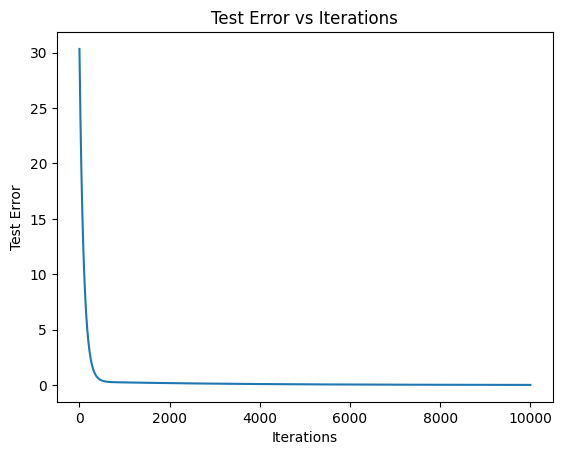

In [7]:
eta = 1e-3
w_init = torch.randn(d, 1)

w_trained, test_err = train_model(X_train, Y_train, X_test, Y_test, w_init, eta)

if len(test_err) > 0:
    plt.plot(test_err)
    plt.xlabel("Iterations")
    plt.ylabel("Test Error")
    plt.title("Test Error vs Iterations")
    plt.show()
else:
    print("Test error list is empty. Complete Task 4 to see the plot.")



In [9]:
w_opt = w_closed_form(X_train, Y_train)

train_loss_opt = l2_loss(X_train, Y_train, w_opt)
test_loss_opt = l2_loss(X_test, Y_test, w_opt)

eta = 1e-3
w_init = torch.randn(d, 1)

w_trained, test_err = train_model(X_train, Y_train, X_test, Y_test, w_init, eta)

final_train_loss_gd = l2_loss(X_train, Y_train, w_trained)
final_test_loss_gd = l2_loss(X_test, Y_test, w_trained)

print("-" * 30)
print("CLOSED-FORM SOLUTION:")
print(f"Train Loss: {train_loss_opt.item():.6f}")
print(f"Test Loss:  {test_loss_opt.item():.6f}")
print("-" * 30)
print("GRADIENT DESCENT SOLUTION:")
print(f"Final Train Loss: {final_train_loss_gd.item():.6f}")
print(f"Final Test Loss:  {final_test_loss_gd.item():.6f}")
print(f"Iterations taken: {len(test_err)}")
print("-" * 30)

------------------------------
CLOSED-FORM SOLUTION:
Train Loss: 0.002269
Test Loss:  0.002354
------------------------------
GRADIENT DESCENT SOLUTION:
Final Train Loss: 0.017294
Final Test Loss:  0.017339
Iterations taken: 10000
------------------------------
